In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1 Lattice
* The lattice is created using the function `create_lattice` where the argument is the size of the lattice
* To compute the variance we first defined a function `dist` that computes the distance between two points, taking into account periodic boundary connditions. Then we use the function `compute_variance_R` to compute the variance for a given radius sampling $10000$ random points. The final step is the function `get_variance_R` that calls the previous one for all the radius and save the results on a file. The maximum radius is $L/2$ because for larger ones we would have an circle larger than the lattice, and we would count multiple times same points.
* We then plot the results here using Python
* The constant at which $\frac{\sigma (R)}{R^2}$ tends for small distances is given by the fact that for small radius we can have 0 or 1 point inside the circle, averaging this will give a constant value
* The oscillations are generated by the periodicity and uniformity of the lattice, since inside a certain range the increasing of the radius will not add more points, then for a certain value we reach another *layer* of points and we keep going like that, as there were steps for the radius to reach other points 
* At large distances the idea of the steps is no more valid, since the points outside are way less than the ones already inside, thus making the $\sigma$ tend to a const value


In [19]:
data10 = np.loadtxt("c++/data/10.csv", delimiter=" ")
data50 = np.loadtxt("c++/data/50.csv", delimiter=" ")
data100 = np.loadtxt("c++/data/100.csv", delimiter=" ")
data200 = np.loadtxt("c++/data/200.csv", delimiter=" ")

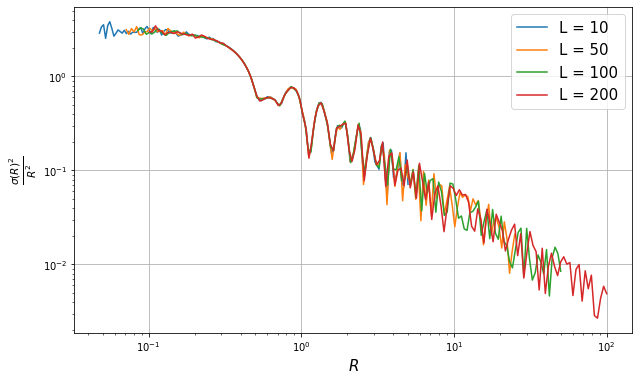

In [37]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data10[50:,0], data10[50:,1], label="L = 10")
ax.plot(data50[50:,0], data50[50:,1], label="L = 50")
ax.plot(data100[50:,0], data100[50:,1], label="L = 100")
ax.plot(data200[50:,0], data200[50:,1], label="L = 200")

ax.set_xlabel(r"$R$", size=15)
ax.set_ylabel(r"$\frac{\sigma(R)^2}{R^2}$", size=15)
ax.grid()
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')

# 2 Shuffled Lattice
* The function `AddDisplacement` randomly apply a displacement to all points of the lattice, based on $\Delta$

## $L=100\;,\;\Delta = 1,2,3,4,5$

In [32]:
data1 = np.loadtxt("c++/data/100delta1.csv", delimiter=" ")
data2 = np.loadtxt("c++/data/100delta2.csv", delimiter=" ")
data3 = np.loadtxt("c++/data/100delta3.csv", delimiter=" ")
data4 = np.loadtxt("c++/data/100delta4.csv", delimiter=" ")
data5 = np.loadtxt("c++/data/100delta5.csv", delimiter=" ")

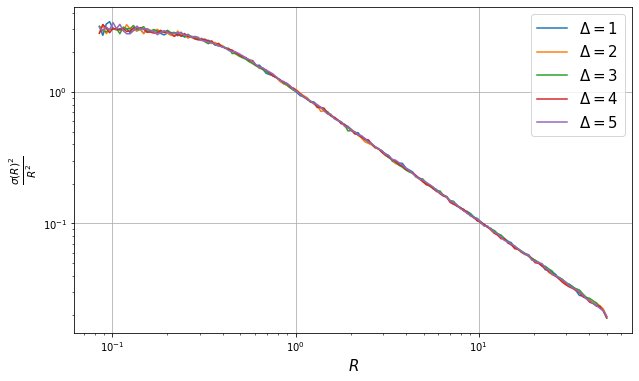

In [38]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data1[50:,0], data1[50:,1], label=r"$\Delta = 1$")
ax.plot(data2[50:,0], data2[50:,1], label=r"$\Delta = 2$")
ax.plot(data3[50:,0], data3[50:,1], label=r"$\Delta = 3$")
ax.plot(data4[50:,0], data4[50:,1], label=r"$\Delta = 4$")
ax.plot(data5[50:,0], data5[50:,1], label=r"$\Delta = 5$")

ax.set_xlabel(r"$R$", size=15)
ax.set_ylabel(r"$\frac{\sigma(R)^2}{R^2}$", size=15)
ax.grid()
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')

## $L = 50,100,200\;,\;\Delta = 2$

In [13]:
data50_2 = np.loadtxt("c++/data/50deltafix2.csv", delimiter=" ")
data100_2 = np.loadtxt("c++/data/100deltafix2.csv", delimiter=" ")
data200_2 = np.loadtxt("c++/data/200deltafix2.csv", delimiter=" ")

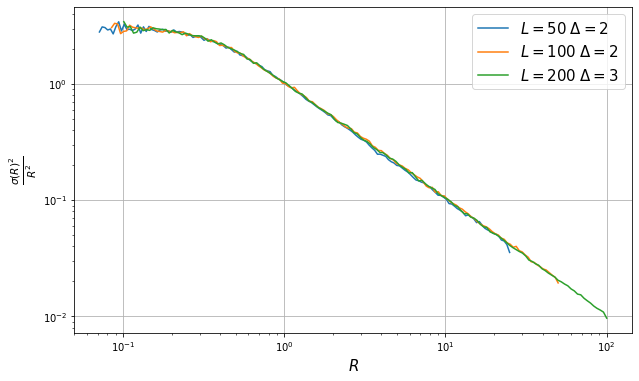

In [39]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data50_2[50:,0], data50_2[50:,1], label=r"$L = 50\;\Delta = 2$")
ax.plot(data100_2[50:,0], data100_2[50:,1], label=r"$L = 100\;\Delta = 2$")
ax.plot(data200_2[50:,0], data200_2[50:,1], label=r"$L = 200\;\Delta = 3$")

ax.set_xlabel(r"$R$", size=15)
ax.set_ylabel(r"$\frac{\sigma(R)^2}{R^2}$", size=15)
ax.grid()
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')

We also tried a second, more optimized approach, that is not completely correct though. Indedd using the functions `GetN_x0` and `GetVarianceOpt` we compute $\sigma$ for a fixed $x_{0}$ looping over all radius, and we draw the $10000$ random points after this loop. This way we can optimize the counting, since we compute all the distances from $x_0$ just once, keeping them sorted, so that for the $200$ radius we only have to take a portion of this ordered list, without computing anything else.

The approximation is that this way the computation over different radius is not independent, the trade off is that the simulation is much faster:

Simulations/L | 50 | 100 | 200
--- | --- | --- | ---
Opt | $0.4s$ | $1.6s$ | $7.2s$
Basic | $11.3 s$ | $45.4s$ | $180.2s$


We also report here the result of the optimized simulation for $\Delta = 2$ and $L = 50,100,200$, where we can notice that the approximation is not good for small radius, while it is similar to the basic one for larger values.

In [15]:
data50_o = np.loadtxt("c++/data/opt50_2.csv", delimiter=" ")
data100_o = np.loadtxt("c++/data/opt100_2.csv", delimiter=" ")
data200_o = np.loadtxt("c++/data/opt200_2.csv", delimiter=" ")

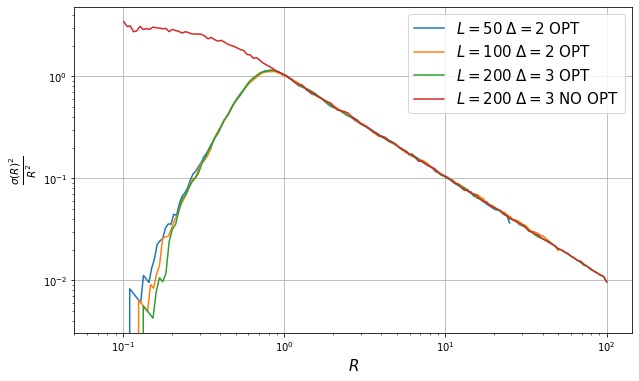

In [40]:
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data50_o[50:,0], data50_o[50:,1], label=r"$L = 50\;\Delta = 2$ OPT")
ax.plot(data100_o[50:,0], data100_o[50:,1], label=r"$L = 100\;\Delta = 2$ OPT")
ax.plot(data200_o[50:,0], data200_o[50:,1], label=r"$L = 200\;\Delta = 3$ OPT")
ax.plot(data200_2[50:,0], data200_2[50:,1], label=r"$L = 200\;\Delta = 3$ NO OPT")

ax.set_xlabel(r"$R$", size=15)
ax.set_ylabel(r"$\frac{\sigma(R)^2}{R^2}$", size=15)
ax.grid()
ax.legend(fontsize=15)
ax.set_xscale('log')
ax.set_yscale('log')